In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp
from scipy.signal import find_peaks


In [8]:
#import force plate data from prepared full signal file and metadata to have the pitch velocities

force_plate = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/full_sig/force_plate.csv")
meta = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/metadata.csv")

#merge the two to get pitch velocities for each session pitch
merged = pd.merge(force_plate, meta[['session_pitch', 'pitch_speed_mph']], on='session_pitch')

#create copy of df to not ruin the main df in case analysis gets messed up
merged_c = merged.copy()

In [46]:
#set a threshold for hard throwers in the dataset at the top 10 percentile and do analysis on those 
ht_thresh = merged_c['pitch_speed_mph'].quantile(.90) #this turns out to be 90.6 mph
#ht_thresh 


#filter out the hard throwers from the dataset 
hard_throwers = merged_c[merged_c['pitch_speed_mph'] >= ht_thresh]

#see how many pitches are in the hard throwers df
print(len(hard_throwers['session_pitch'].unique())) #43 pitches

#see how many pitches are not in the hard throwers df
print(len(merged_c['session_pitch'].unique()) - len(hard_throwers['session_pitch'].unique())) #360 pitches

78.8
43
360


## Start of the correlation analysis

In [24]:
# calculate a simple correlation matrix
correlation_matrix = hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].corr()
print(correlation_matrix)



              rear_force_x  rear_force_y  rear_force_z
rear_force_x      1.000000      0.108936      0.699038
rear_force_y      0.108936      1.000000      0.166763
rear_force_z      0.699038      0.166763      1.000000


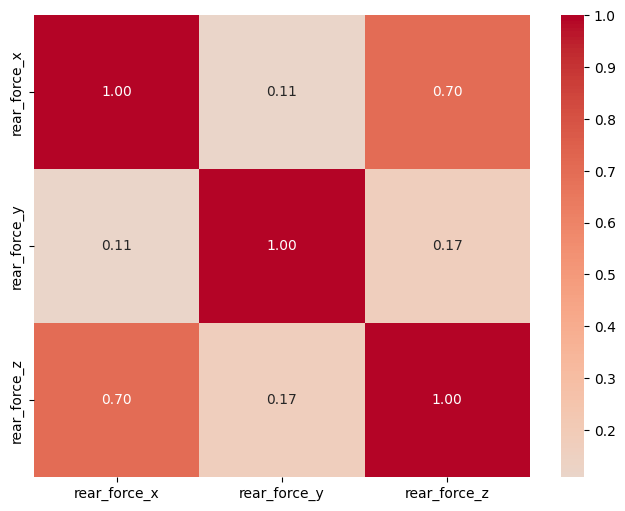

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

## Time Lagged Correlation

#### Practical Consideration: A max lag of 50 to 100 data points is often sufficient for many analyses. This corresponds to about 139 to 278 milliseconds, which should capture the immediate and near-immediate effects in most dynamic movements.


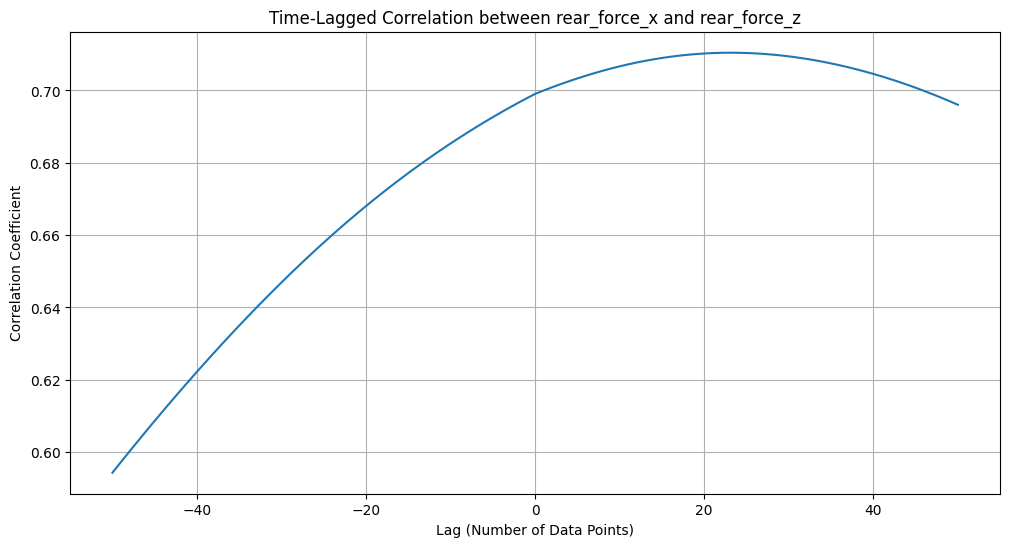

In [31]:
max_lag = 50  # Represents a lag of up to about 139 milliseconds
lagged_correlations = {}

for lag in range(-max_lag, max_lag + 1):
    shifted_df = hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].shift(lag)
    correlation = shifted_df.corrwith(hard_throwers['rear_force_x']).loc['rear_force_z']
    lagged_correlations[lag] = correlation

# Convert to a Series for easy plotting
lagged_correlations_series = pd.Series(lagged_correlations)

# Plotting
plt.figure(figsize=(12, 6))
lagged_correlations_series.plot(kind='line')
plt.title('Time-Lagged Correlation between rear_force_x and rear_force_z')
plt.xlabel('Lag (Number of Data Points)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


In [48]:
not_hard_throwers = merged_c[merged_c['pitch_speed_mph'] < ht_thresh]


In [36]:
# calculate a simple correlation matrix
correlation_matrix2 = not_hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].corr()
print(correlation_matrix2)

              rear_force_x  rear_force_y  rear_force_z
rear_force_x      1.000000      0.014744      0.755715
rear_force_y      0.014744      1.000000      0.115010
rear_force_z      0.755715      0.115010      1.000000


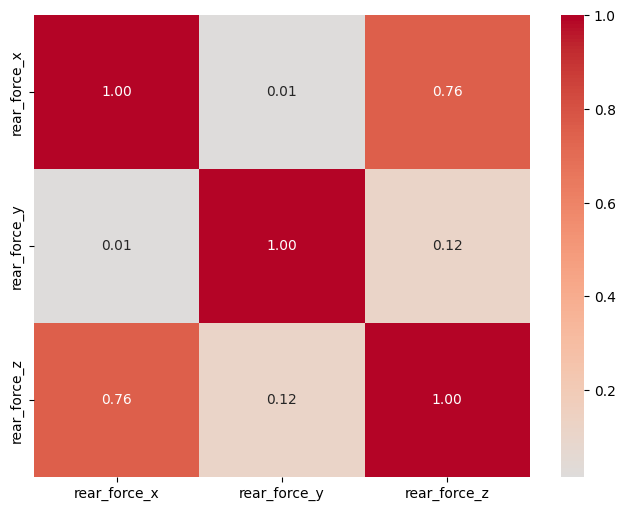

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

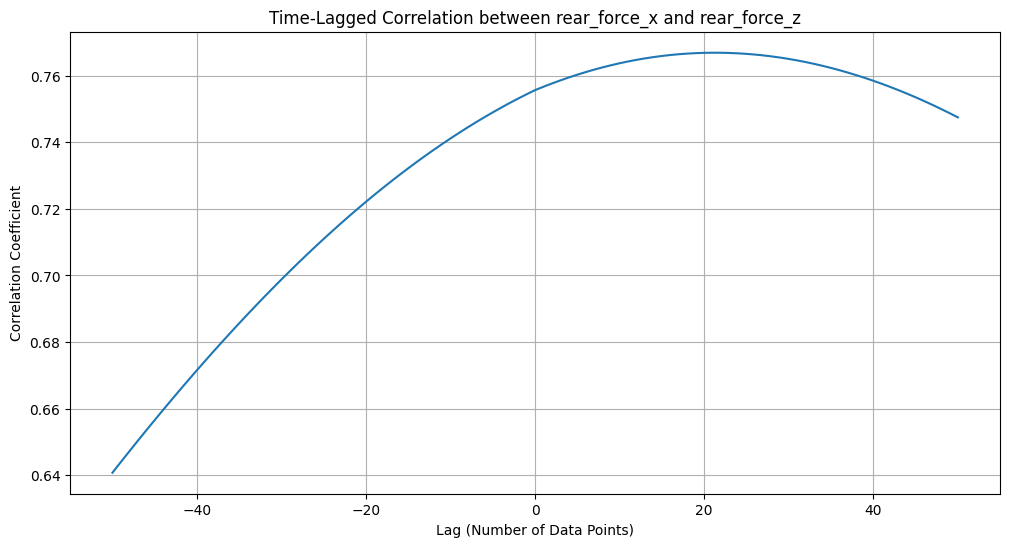

In [42]:
max_lag = 50  # Represents a lag of up to about 139 milliseconds
lagged_correlations = {}

for lag in range(-max_lag, max_lag + 1):
    shifted_df2 = not_hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].shift(lag)
    correlation2 = shifted_df2.corrwith(not_hard_throwers['rear_force_x']).loc['rear_force_z']
    lagged_correlations[lag] = correlation2

# Convert to a Series for easy plotting
lagged_correlations_series = pd.Series(lagged_correlations)

# Plotting
plt.figure(figsize=(12, 6))
lagged_correlations_series.plot(kind='line')
plt.title('Time-Lagged Correlation between rear_force_x and rear_force_z')
plt.xlabel('Lag (Number of Data Points)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


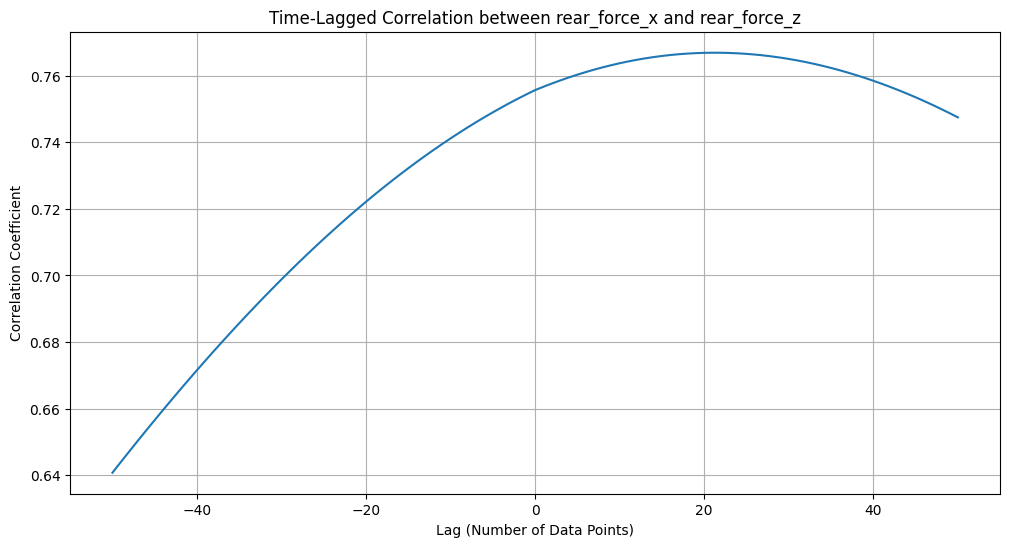

In [ ]:
max_lag = 50  # Represents a lag of up to about 139 milliseconds
lagged_correlations = {}

for lag in range(-max_lag, max_lag + 1):
    shifted_df2 = not_hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].shift(lag)
    correlation2 = shifted_df2.corrwith(not_hard_throwers['rear_force_x']).loc['rear_force_z']
    lagged_correlations[lag] = correlation2

# Convert to a Series for easy plotting
lagged_correlations_series = pd.Series(lagged_correlations)

# Plotting
plt.figure(figsize=(12, 6))
lagged_correlations_series.plot(kind='line')
plt.title('Time-Lagged Correlation between rear_force_x and rear_force_z')
plt.xlabel('Lag (Number of Data Points)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


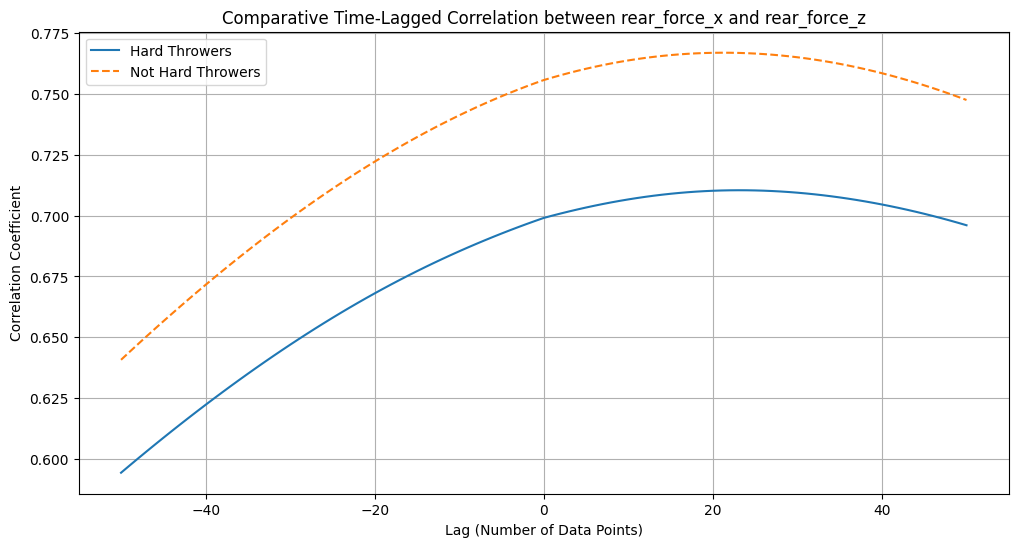

In [53]:
max_lag = 50
lagged_correlations_hard = {}

for lag in range(-max_lag, max_lag + 1):
    shifted_df = hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].shift(lag)
    correlation = shifted_df.corrwith(hard_throwers['rear_force_x']).loc['rear_force_z']
    lagged_correlations_hard[lag] = correlation

# Calculate the lagged correlations for the second population (not_hard_throwers)
lagged_correlations_not_hard = {}

for lag in range(-max_lag, max_lag + 1):
    shifted_df2 = not_hard_throwers[['rear_force_x', 'rear_force_y', 'rear_force_z']].shift(lag)
    correlation2 = shifted_df2.corrwith(not_hard_throwers['rear_force_x']).loc['rear_force_z']
    lagged_correlations_not_hard[lag] = correlation2

# Convert to Series for easy plotting
lagged_correlations_series_hard = pd.Series(lagged_correlations_hard)
lagged_correlations_series_not_hard = pd.Series(lagged_correlations_not_hard)

# Plotting both on the same graph for comparison
plt.figure(figsize=(12, 6))
lagged_correlations_series_hard.plot(kind='line', label='Hard Throwers')
lagged_correlations_series_not_hard.plot(kind='line', label='Not Hard Throwers', linestyle='--')
plt.title('Comparative Time-Lagged Correlation between rear_force_x and rear_force_z')
plt.xlabel('Lag (Number of Data Points)')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True)
plt.show()